<a href="https://colab.research.google.com/github/channachot/Project1/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!git clone https://github.com/channachot/Project1.git

fatal: destination path 'Project1' already exists and is not an empty directory.


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import random 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mig
import cv2
from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
DATADIR = "Project1/PokemonData"
CATEGORIES = os.listdir(DATADIR)




IMG_SIZE = 128
training_data = []
test_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        #k=0
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
                k=k+1
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #if(k==25):
            #  break
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
def create_test_data():
    for category in CATEGORIES:  # do dogs and cats
        k=0
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            k=k+1
            if(k==8):
              break

create_training_data()
create_test_data()
print(len(training_data))
print(len(test_data))


  0%|          | 0/48 [00:00<?, ?it/s]

6825
1198


In [0]:
X_train = []
y_train = []
X_test = []
y_test = []
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)   

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE,3)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,3)
X_train.shape
X_test.shape
training_data.clear()
test_data.clear()



In [5]:
'''
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)
'''

'\npickle_in = open("X_train.pickle","rb")\nX_train = pickle.load(pickle_in)\n\npickle_in = open("y_train.pickle","rb")\ny_train = pickle.load(pickle_in)\n\npickle_in = open("X_test.pickle","rb")\nX_test = pickle.load(pickle_in)\n\npickle_in = open("y_test.pickle","rb")\ny_test = pickle.load(pickle_in)\n'

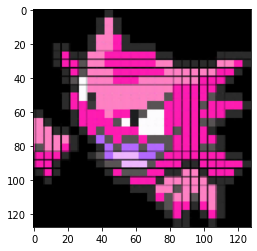

In [6]:
# Let's view some images!
i = random.randint(1,2000) # select any random index from 1 to 60,000

plt.imshow(X_train[i] , cmap = 'gray')  # reshape and plot the image
j = random.randint(1,500) # select any random index from 1 to 60,000

plt.imshow(X_test[j] , cmap = 'gray')


In [7]:
labeltrain = y_train[i]
labeltest = y_test[j]
labeltrain 
labeltest


49

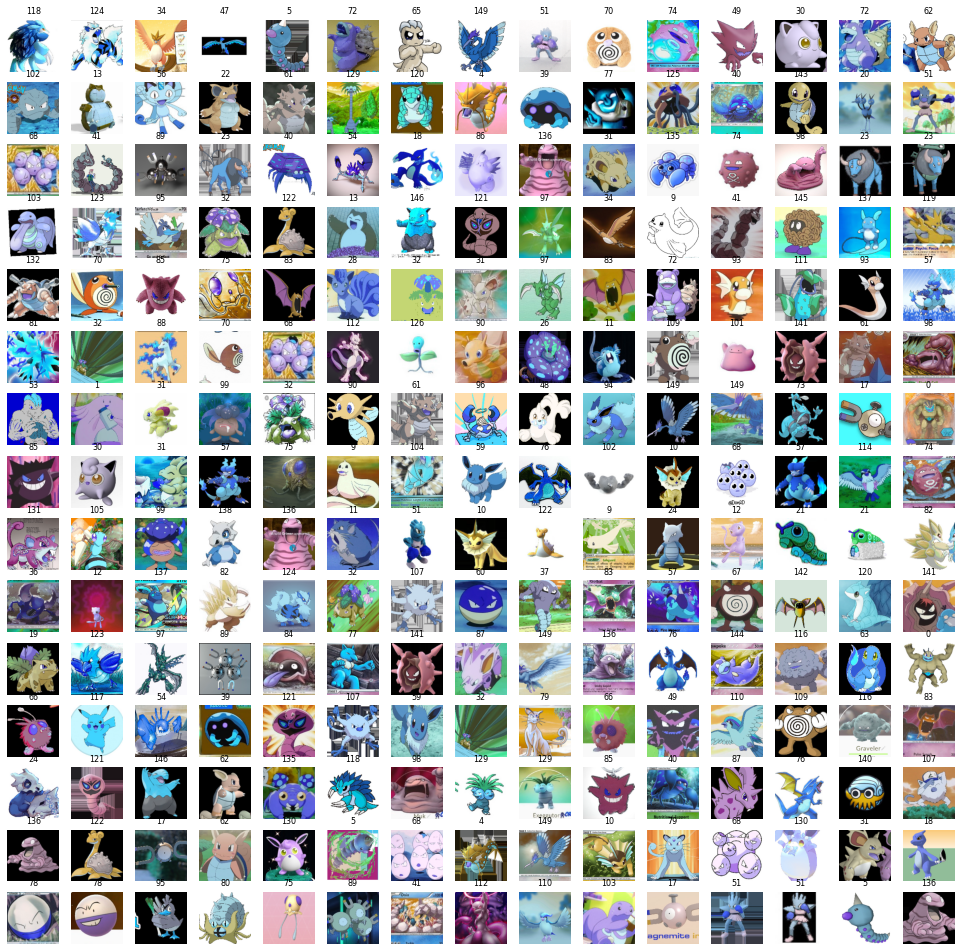

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')




In [9]:
# Let's normalize the data
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(6825, 128, 128, 3)

In [0]:
'''
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(256, 256, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))
'''

autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(IMG_SIZE,IMG_SIZE, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same")) # Encoded image (Code Layer)


# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))


In [11]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0

In [12]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=20, 
          batch_size=8, 
          validation_data=(X_test, X_test))


Epoch 1/20
854/854 [==============================] - 28s 32ms/step - loss: 0.4702 - val_loss: 0.4486
Epoch 2/20
854/854 [==============================] - 27s 32ms/step - loss: 0.4455 - val_loss: 0.4557
Epoch 3/20
854/854 [==============================] - 27s 32ms/step - loss: 0.4363 - val_loss: 0.4373
Epoch 4/20
854/854 [==============================] - 27s 32ms/step - loss: 0.4305 - val_loss: 0.4340
Epoch 5/20
854/854 [==============================] - 27s 32ms/step - loss: 0.4280 - val_loss: 0.4462
Epoch 6/20
854/854 [==============================] - 27s 32ms/step - loss: 0.4236 - val_loss: 0.4282
Epoch 7/20
854/854 [==============================] - 27s 32ms/step - loss: 0.4255 - val_loss: 2.1049
Epoch 8/20
854/854 [==============================] - 27s 32ms/step - loss: 0.4241 - val_loss: 0.4295
Epoch 9/20
854/854 [==============================] - 27s 32ms/step - loss: 0.4223 - val_loss: 0.4256
Epoch 10/20
854/854 [==============================] - 27s 32ms/step - loss: 0.420

In [0]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

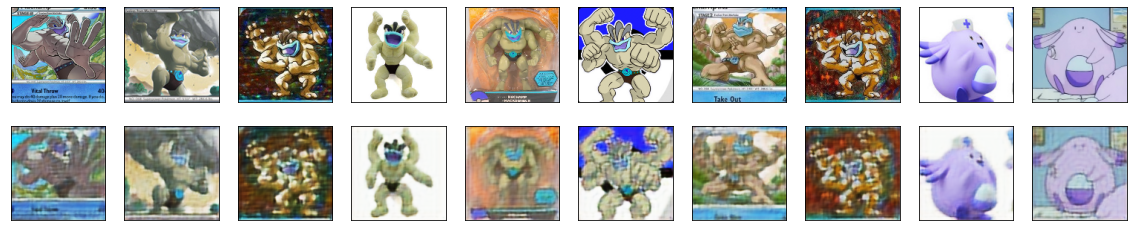

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((IMG_SIZE, IMG_SIZE, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)